## Best practices in explanatory Data Visualization
### _with `seaborn` and `matplotlib`_

In [18]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [19]:
df = pd.read_csv("data/dfs_merged_2000.csv")

In [20]:
df

,country,life_expectancy,fertility_rate,population,continent
0,Afghanistan,50.1,7.73,19701940.0,Asia
1,Albania,74.7,2.38,3121965.0,Europe
2,Algeria,73.3,2.51,31183658.0,Africa
3,Angola,52.3,6.84,15058638.0,Africa
4,Antigua and Barbuda,73.8,2.32,77648.0,North America
...,...,...,...,...,...
163,Venezuela,73.8,2.82,24481477.0,South America
164,Vietnam,72.0,1.98,80285563.0,Asia
165,Yemen,62.4,6.36,17795219.0,Asia
166,Zambia,44.8,6.07,10585220.0,Africa


### Make a scatterplot with `seaborn` of fertility rate vs life expectancy 
- Color markers by continent
- Size markers by population

<Axes: xlabel='fertility_rate', ylabel='life_expectancy'>

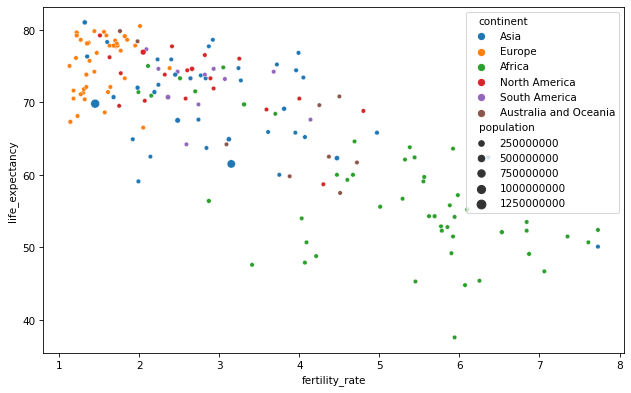

In [21]:
plt.figure(figsize = (10,6), dpi = 75)
sns.scatterplot(data = df, 
                x = 'fertility_rate', 
                y = 'life_expectancy', 
                hue = 'continent', 
                size = 'population')

## **BEST PRACTICE**: SIMPLIFY 
- 0. **Make it legible**
- 1. **Eliminate clutter**: get rid of elements that don't aid to the understanding of the message (_chart junk_)

#### Take out the legend

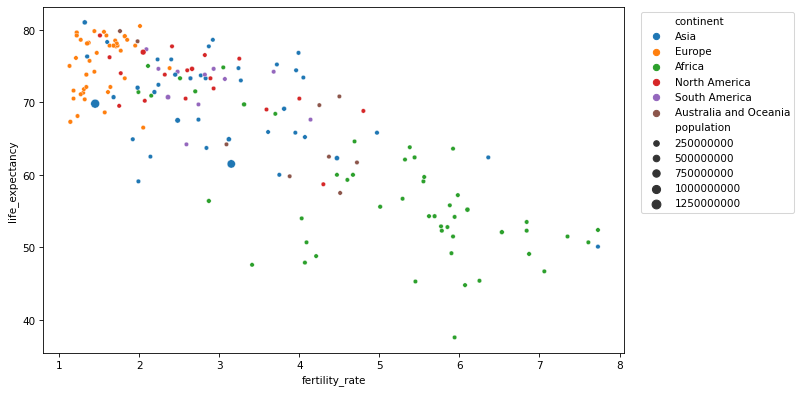

In [22]:
plt.figure(figsize = (10,6), dpi = 75)
sns.scatterplot(data = df, x = 'fertility_rate', y = 'life_expectancy', hue = 'continent', size = df['population'])
plt.legend(bbox_to_anchor=(1.02, 1), loc=2)

#### Adjust marker sizes to make differences visible 

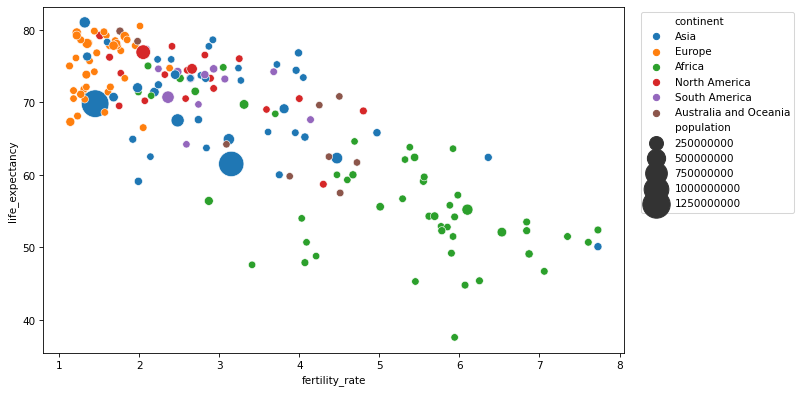

In [23]:
plt.figure(figsize = (10,6), dpi = 75)
sns.scatterplot(data = df, x = 'fertility_rate', y = 'life_expectancy', hue = 'continent', size = df['population'],sizes = (50,700))
plt.legend(bbox_to_anchor=(1.02, 1), loc=2)

#### Eliminate clutter 

##### Get rid of rectangle box
- `sns.despine()`

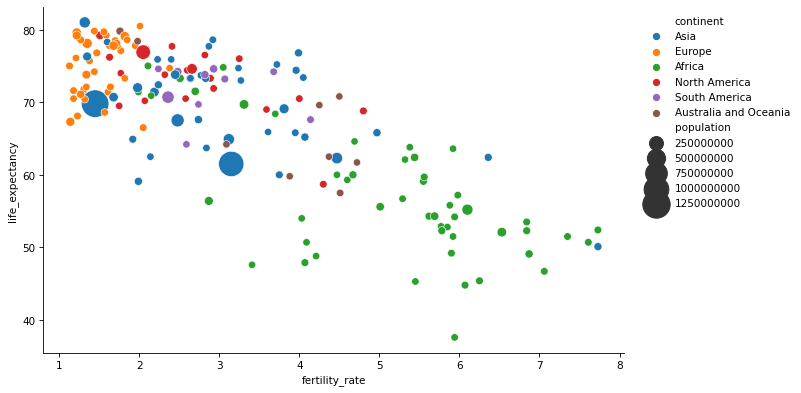

In [24]:
plt.figure(figsize = (10,6), dpi = 75)
sns.scatterplot(data = df, x = 'fertility_rate', y = 'life_expectancy', hue = 'continent', size = df['population'],sizes = (50,700))
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, frameon = False)
sns.despine()

##### Improve legend
- Get rid of box
- Don't show the population part

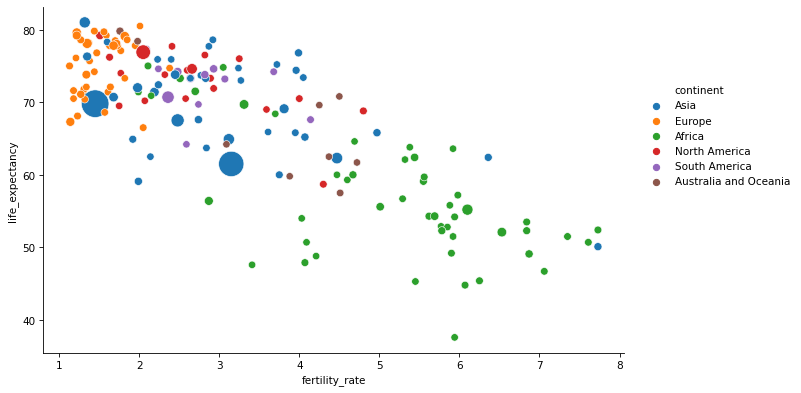

In [25]:
plt.figure(figsize = (10,6), dpi = 75)
g = sns.scatterplot(data = df, x = 'fertility_rate', y = 'life_expectancy', hue = 'continent', size = df['population'],sizes = (50,700))
h,l = g.get_legend_handles_labels()
plt.legend(h[0:7],l[0:7],bbox_to_anchor=(1.02, 0.8), loc=2, frameon = False)
sns.despine()

#### Adjust ticks + label text size

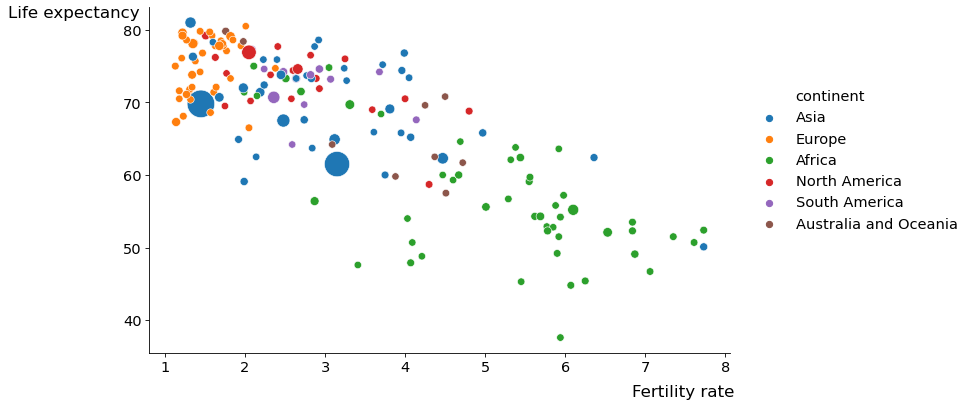

In [26]:
plt.figure(figsize = (10,6), dpi = 75)
ax = plt.gca()
g = sns.scatterplot(data = df, x = 'fertility_rate', y = 'life_expectancy', hue = 'continent', size = df['population'],sizes = (50,700))
h,l = g.get_legend_handles_labels()
plt.legend(h[0:7],l[0:7],bbox_to_anchor=(1.02, 0.8), loc=2, frameon = False, fontsize = 14)

plt.xlabel(r"Fertility rate", size = 16)
plt.ylabel('Life expectancy',rotation=0, size = 16)
ax.yaxis.set_label_coords(-0.13,0.96)
ax.xaxis.set_label_coords(0.92,-0.09)
ax.tick_params(axis='both', which='major', labelsize=14)

sns.despine()

## **BEST PRACTICE**: DRAW ATTENTION to your important points
Things to know:
- Which are my important points?
- What is my message?
- What do I want to show?

Things to do: 
- Emphasize your foreground data
- De-emphsize background data

> "I want to see how Mexico is doing compared to other countries"

#### Add Labels to countries of interest

In [27]:
country_list = ['Mexico']

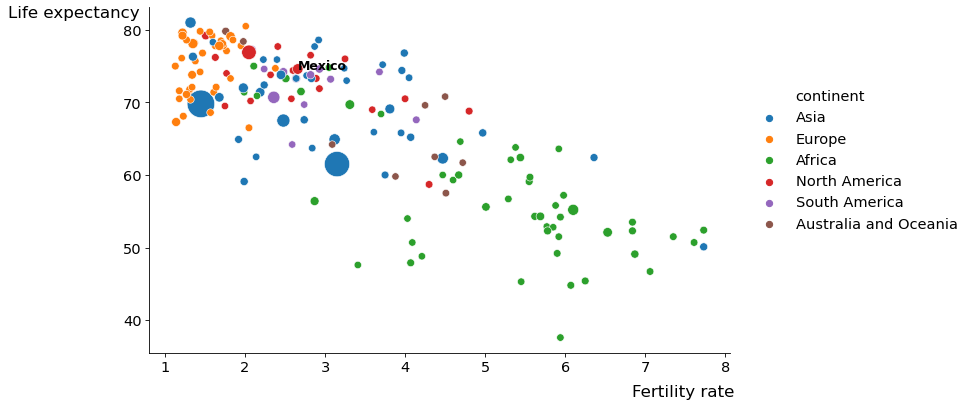

In [28]:
plt.figure(figsize = (10,6), dpi = 75)
ax = plt.gca()
g = sns.scatterplot(data = df, x = 'fertility_rate', y = 'life_expectancy', hue = 'continent', size = df['population'],sizes = (50,700))
h,l = g.get_legend_handles_labels()
plt.legend(h[0:7],l[0:7],bbox_to_anchor=(1.02, 0.8), loc=2, frameon = False, fontsize = 14)

plt.xlabel(r"Fertility rate", size = 16)
plt.ylabel('Life expectancy',rotation=0, size = 16)
ax.yaxis.set_label_coords(-0.13,0.96)
ax.xaxis.set_label_coords(0.92,-0.09)
ax.tick_params(axis='both', which='major', labelsize=14)

sns.despine()

for i in country_list:
    x_cor = float(df.loc[df['country']== i, ['fertility_rate']].values[0])
    y_cor = float(df.loc[df['country']== i, ['life_expectancy']].values[0])
    plt.text(s = i, x = x_cor, y = y_cor, fontsize =12, weight = 'bold')

## **BEST PRACTICE**: USE COLOR WITH INTENTION
- The most important color in Data Visualization is grey!
- The standard categorical `seaborn` palettes are great: https://seaborn.pydata.org/tutorial/color_palettes.html
- In case you want to choose your own? [Q: When is this the case?]
    - https://academy.datawrapper.de/article/140-what-to-consider-when-choosing-colors-for-data-visualization
    - https://projects.susielu.com/viz-palette
    - https://coolors.co/

#### Improve original palete

In [67]:
continent_colors = ["#6c757d",'#ff758f', "#EDAE49", '#90e0ef', '#b3d89c','#d8bbff']

> "I want to see how Mexico is doing compared to the european countries"

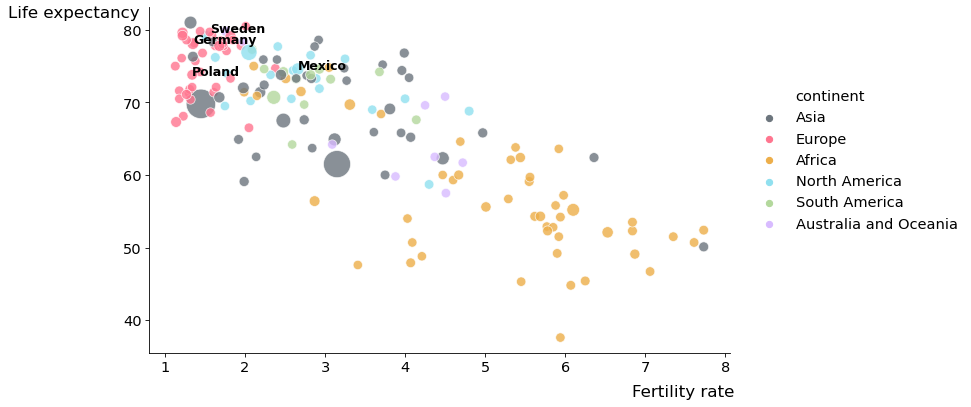

In [68]:
plt.figure(figsize = (10,6), dpi = 75)
ax = plt.gca()
g = sns.scatterplot(data = df, 
                    x = 'fertility_rate', 
                    y = 'life_expectancy', 
                    hue = 'continent', 
                    size = df['population'],
                    sizes = (80,800),
                    palette = continent_colors,
                    alpha = 0.8)
h,l = g.get_legend_handles_labels()
plt.legend(h[0:7],l[0:7],bbox_to_anchor=(1.02, 0.8), loc=2, frameon = False, fontsize = 14)

plt.xlabel(r"Fertility rate", size = 16)
plt.ylabel('Life expectancy',rotation=0, size = 16)
ax.yaxis.set_label_coords(-0.13,0.96)
ax.xaxis.set_label_coords(0.92,-0.09)
ax.tick_params(axis='both', which='major', labelsize=14)

sns.despine()

for i in country_list:
    x_cor = float(df.loc[df['country']== i, ['fertility_rate']].values[0])
    y_cor = float(df.loc[df['country']== i, ['life_expectancy']].values[0])
    plt.text(s = i, x = x_cor, y = y_cor, fontsize =12, weight = 'bold')

## **BEST PRACTICE**: ANNOTATE

#### Add title

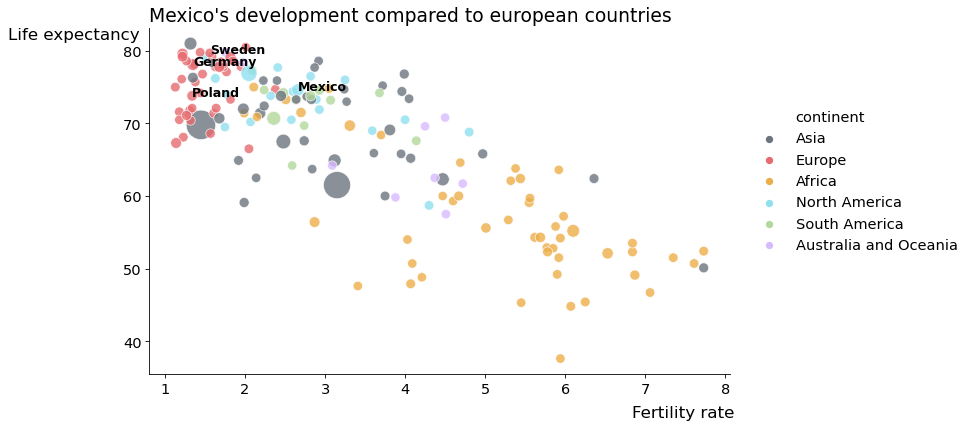

In [61]:
plt.figure(figsize = (10,6), dpi = 75)
ax = plt.gca()
g = sns.scatterplot(data = df, 
                    x = 'fertility_rate', 
                    y = 'life_expectancy', 
                    hue = 'continent', 
                    size = df['population'],
                    sizes = (80,800),
                    palette = continent_colors,
                    alpha = 0.8)
h,l = g.get_legend_handles_labels()
plt.legend(h[0:7],l[0:7],bbox_to_anchor=(1.02, 0.8), loc=2, frameon = False, fontsize = 14)

plt.xlabel(r"Fertility rate", size = 16)
plt.ylabel('Life expectancy',rotation=0, size = 16)
ax.yaxis.set_label_coords(-0.13,0.96)
ax.xaxis.set_label_coords(0.92,-0.09)
ax.tick_params(axis='both', which='major', labelsize=14)

plt.title(r"Mexico's development compared to european countries", fontsize = 18, loc = 'left')

sns.despine()

for i in country_list:
    x_cor = float(df.loc[df['country']== i, ['fertility_rate']].values[0])
    y_cor = float(df.loc[df['country']== i, ['life_expectancy']].values[0])
    plt.text(s = i, x = x_cor, y = y_cor, fontsize =12, weight = 'bold')

#### Add current year for context
- `plt.text()`

Text(7, 80, '2015')

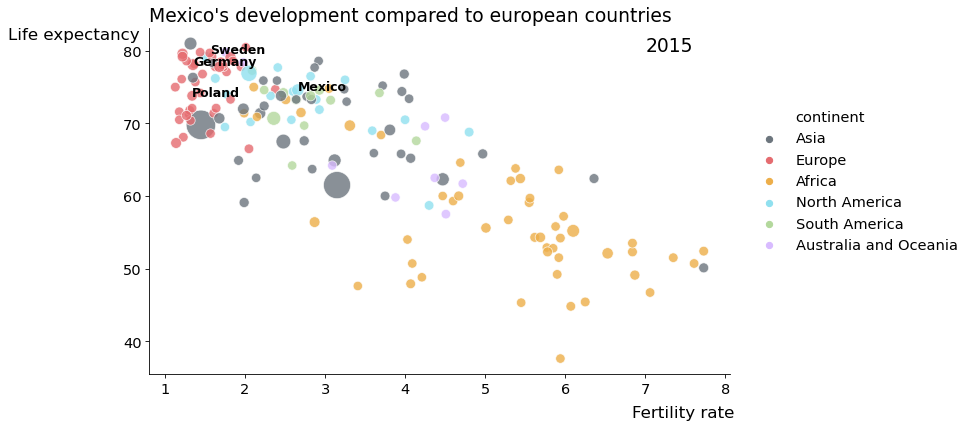

In [62]:
plt.figure(figsize = (10,6), dpi = 75)
ax = plt.gca()
g = sns.scatterplot(data = df, 
                    x = 'fertility_rate', 
                    y = 'life_expectancy', 
                    hue = 'continent', 
                    size = df['population'],
                    sizes = (80,800),
                    palette = continent_colors,
                    alpha = 0.8)
h,l = g.get_legend_handles_labels()
plt.legend(h[0:7],l[0:7],bbox_to_anchor=(1.02, 0.8), loc=2, frameon = False, fontsize = 14)

plt.xlabel(r"Fertility rate", size = 16)
plt.ylabel('Life expectancy',rotation=0, size = 16)
ax.yaxis.set_label_coords(-0.13,0.96)
ax.xaxis.set_label_coords(0.92,-0.09)
ax.tick_params(axis='both', which='major', labelsize=14)

plt.title(r"Mexico's development compared to european countries", fontsize = 18, loc = 'left')

sns.despine()

for i in country_list:
    x_cor = float(df.loc[df['country']== i, ['fertility_rate']].values[0])
    y_cor = float(df.loc[df['country']== i, ['life_expectancy']].values[0])
    plt.text(s = i, x = x_cor, y = y_cor, fontsize =12, weight = 'bold')

plt.text(s = '2015', x= 7, y = 80, fontsize =18)


### BONUS **BEST PRACTICE**: Choose the right chart
- What do you want to show?
- What is your message?
- (Who is your audience?)

Resources:
- https://www.data-to-viz.com/
- https://www.python-graph-gallery.com/